In [1]:
import numpy as np

from keras.datasets import mnist

In [2]:
data = mnist.load_data()
(x_train, y_train), (x_test, y_test) = data


## VISUALIZING DATA


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

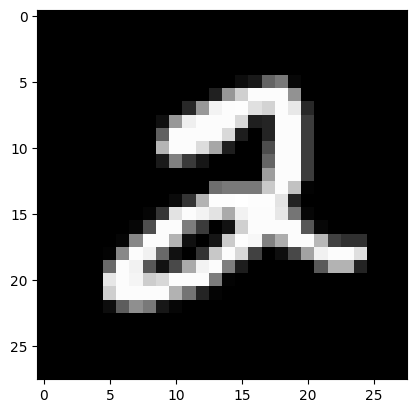

In [5]:
plt.imshow(x_train[5,:,:], cmap = 'gray')

In [6]:
y_train[5]

2

In [7]:
y_train.shape

(60000,)

## Perform OneHotEncoding as the network might confuse with the labels and may consider this as a regression problem

In [8]:
from keras.utils.np_utils import to_categorical

In [9]:
y_cat_test = to_categorical(y_test, num_classes = 10)
y_cat_train = to_categorical(y_train, num_classes = 10)

In [10]:
y_cat_train[5] ## See the 1.0 is at 2nd position i.e 0, 1, 2 == 1. 

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Perform Normalization on the images

In [11]:
x_train = x_train / x_train.max()
x_test = x_test / x_train.max()

In [12]:
x_train.max(); x_train.min()

0.0

In [13]:
x_train.shape

(60000, 28, 28)

## Reshape the data as we need color channels also for our CNN

In [14]:
x_train = x_train.reshape(60000,28,28,1) # 1 bcoz only one channel 
x_train.shape

(60000, 28, 28, 1)

In [15]:
x_test = x_test.reshape(x_test.shape[0], 28,28, 1)
x_test.shape

(10000, 28, 28, 1)

## Building and training the Neural Network

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

############ CONVOLUTIONAL LAYER ############
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1), activation = 'relu'))

############ POOLING LAYER ##################
model.add(MaxPool2D(pool_size = (2,2)))

############ FLATTENING LAYER ###############
######## (IMG GOES FROM 2D --> 1D) ##########
model.add(Flatten())

############ DENSE LAYER ####################
model.add(Dense(128, activation = 'relu'))

############ OUTPUT LAYER ###################
model.add(Dense(10, activation = 'softmax'))

############ COMPILE MODEL ##################
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [19]:
model.fit(x_train, y_cat_train, epochs = 5, batch_size = 100)

Epoch 1/5


600/600 [==============================] - 52s 84ms/step - loss: 0.1988 - accuracy: 0.9401
Epoch 2/5
600/600 [==============================] - 40s 66ms/step - loss: 0.0565 - accuracy: 0.9829
Epoch 3/5
600/600 [==============================] - 34s 56ms/step - loss: 0.0382 - accuracy: 0.9882
Epoch 4/5
600/600 [==============================] - 31s 52ms/step - loss: 0.0277 - accuracy: 0.9919
Epoch 5/5
600/600 [==============================] - 32s 53ms/step - loss: 0.0205 - accuracy: 0.9938


In [20]:
model.metrics_names

['loss', 'accuracy']

In [21]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 3s 8ms/step - loss: 16.6542 - accuracy: 0.9759


[16.654165267944336, 0.9758999943733215]

In [26]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 3s 8ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model.save('mnist_cnn.h5')